In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/dcu/Group-Project


## 1. Problem Statement Block Diagram

In [4]:
fp = "data/tc4tl_training_data_v1/tc4tl/data/train/acffnnsy_tc4tl20.csv"
from src.datapoint import DataPoint

dp = DataPoint(fp)

In [6]:
dp.bluetooth

,Time,Sensor,Rssi
0,0.000,Bluetooth,-51.0
1,0.003,Bluetooth,-51.0
2,0.031,Bluetooth,-52.0
3,0.034,Bluetooth,-52.0
4,0.214,Bluetooth,-46.0
...,...,...,...
1060,341.782,Bluetooth,-67.0
1061,341.812,Bluetooth,-67.0
1062,341.814,Bluetooth,-67.0
1063,341.907,Bluetooth,-66.0


## 2. Feature Importance Plots

See [19.1](#)

## 3. Influence of X on RSSI

In [12]:
from src.dataset.tc4tl import make_datasets
from src.features.beyond import sensor_summary
from src.features.common import postproc_categorical, read_non_sensor_data
from src.featutils import combine

import category_encoders as ce

(trainset, devset, testset), pipe = make_datasets(combine(sensor_summary, read_non_sensor_data), postproc_categorical,
                                     tunables={
                                         "CategoricalEncoder" : ce.polynomial.PolynomialEncoder
                                     }, verbose=True, testing=100)

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 242.63it/s]


NO Pipe input given!


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 257.31it/s]


Pipe input given!


100%|████████████████████████████████████████| 100/100 [00:00<00:00, 254.78it/s]


Pipe input given!


In [14]:
trainset.columns.tolist()

['intercept',
 'Cat:TXDevice_0',
 'Cat:TXDevice_1',
 'Cat:TXDevice_2',
 'Cat:TXDevice_3',
 'Cat:TXDevice_4',
 'Cat:TXDevice_5',
 'Cat:TXDevice_6',
 'Cat:TXDevice_7',
 'Cat:TXDevice_8',
 'Cat:TXDevice_9',
 'Cat:TXDevice_10',
 'Cat:TXDevice_11',
 'Cat:TXPower_0',
 'Cat:TXPower_1',
 'Cat:RXDevice_0',
 'Cat:RXDevice_1',
 'Cat:RXDevice_2',
 'Cat:RXDevice_3',
 'Cat:RXDevice_4',
 'Cat:RXDevice_5',
 'Cat:RXDevice_6',
 'Cat:RXDevice_7',
 'Cat:RXDevice_8',
 'Cat:TXCarry_0',
 'Cat:RXCarry_0',
 'Cat:RXPose_0',
 'Cat:TXPose_0',
 'Bluetooth:Min',
 'Bluetooth:Percentile_1',
 'Bluetooth:Percentile_5',
 'Bluetooth:Percentile_10',
 'Bluetooth:Percentile_25',
 'Bluetooth:Percentile_40',
 'Bluetooth:Mean',
 'Bluetooth:Percentile_65',
 'Bluetooth:Percentile_80',
 'Bluetooth:Percentile_90',
 'Bluetooth:Percentile_95',
 'Bluetooth:Percentile_99',
 'Bluetooth:Max',
 'Attitude_x:Min',
 'Attitude_x:Mean',
 'Attitude_x:Max',
 'Attitude_y:Min',
 'Attitude_y:Mean',
 'Attitude_y:Max',
 'Attitude_z:Min',
 'Attitude_

In [15]:
cat_cols = []
for col in trainset.columns:
    if "Cat:" in col and "_" not in col:
        cat_cols.append(col)
cat_cols

['Cat:TXDevice',
 'Cat:TXPower',
 'Cat:RXDevice',
 'Cat:TXCarry',
 'Cat:RXCarry',
 'Cat:RXPose',
 'Cat:TXPose']

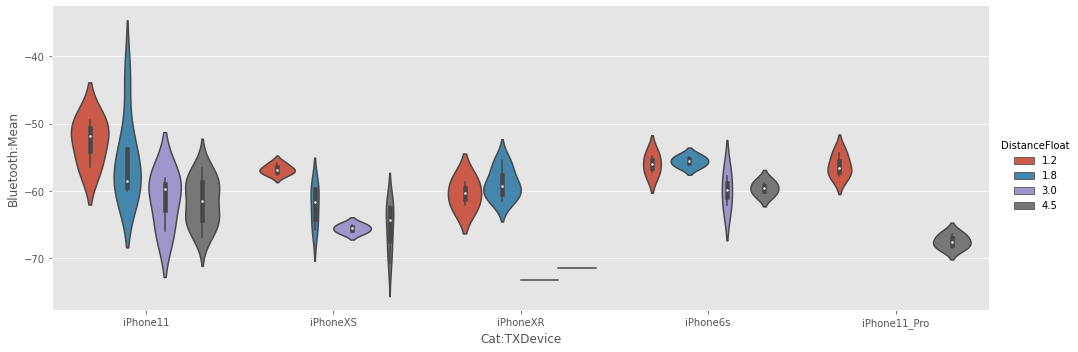

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
subset = trainset[trainset["Cat:TXDevice"].isin(['iPhoneXS', 'iPhoneXR', 'iPhone11', 'iPhone11_Pro', 'iPhone6s'])]
sns.catplot(x="Cat:TXDevice", y="Bluetooth:Mean", hue="DistanceFloat", data=subset, kind="violin", aspect=2.8);

In [86]:
testset["Cat:RXDevice"].unique()

array(['iPhone8', 'iPhone11_Pro', 'iPhone11_Pro_max', 'iPhoneXR',
       'iPhone6s'], dtype=object)

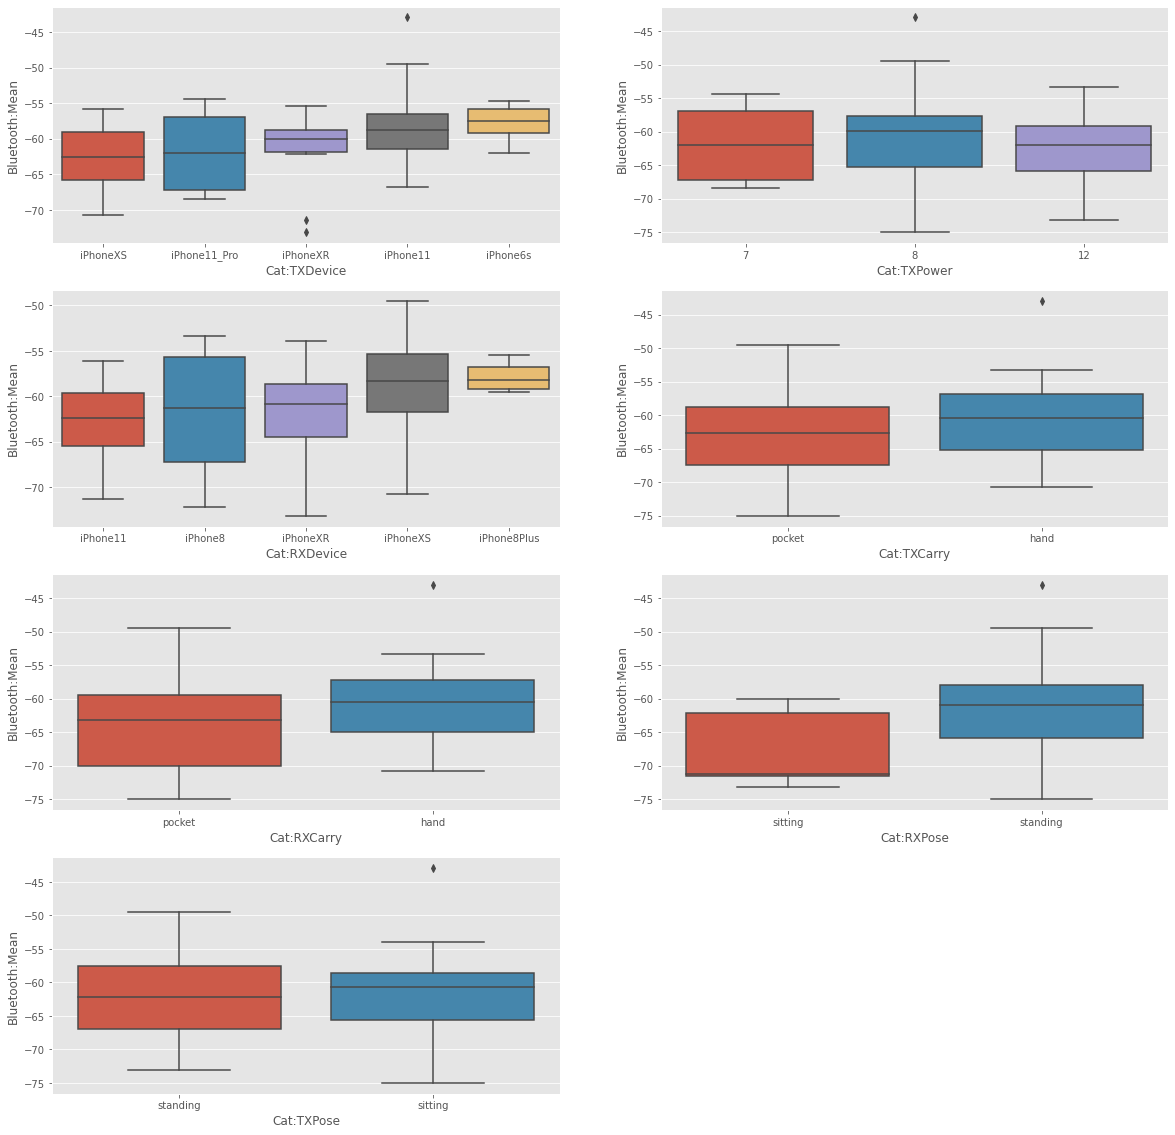

In [105]:
order = {
    "Cat:TXDevice" : ["iPhoneXS", "iPhone11_Pro", "iPhoneXR", "iPhone11", "iPhone6s"],
    "Cat:RXDevice" : ["iPhone11", "iPhone8", "iPhoneXR", "iPhoneXS", "iPhone8Plus", ],
    "Cat:TXPower" : ["7", "8", "12"],
    "Cat:RXPose" : ["sitting", "standing", ],
    "Cat:TXPose" : ["standing", "sitting"]
}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()
fig.delaxes(axes[-1])
for ax, col in zip(axes, cat_cols):
    sns.boxplot(x=col, y="Bluetooth:Mean", data=trainset,
                order=order.get(col),
                ax=ax);

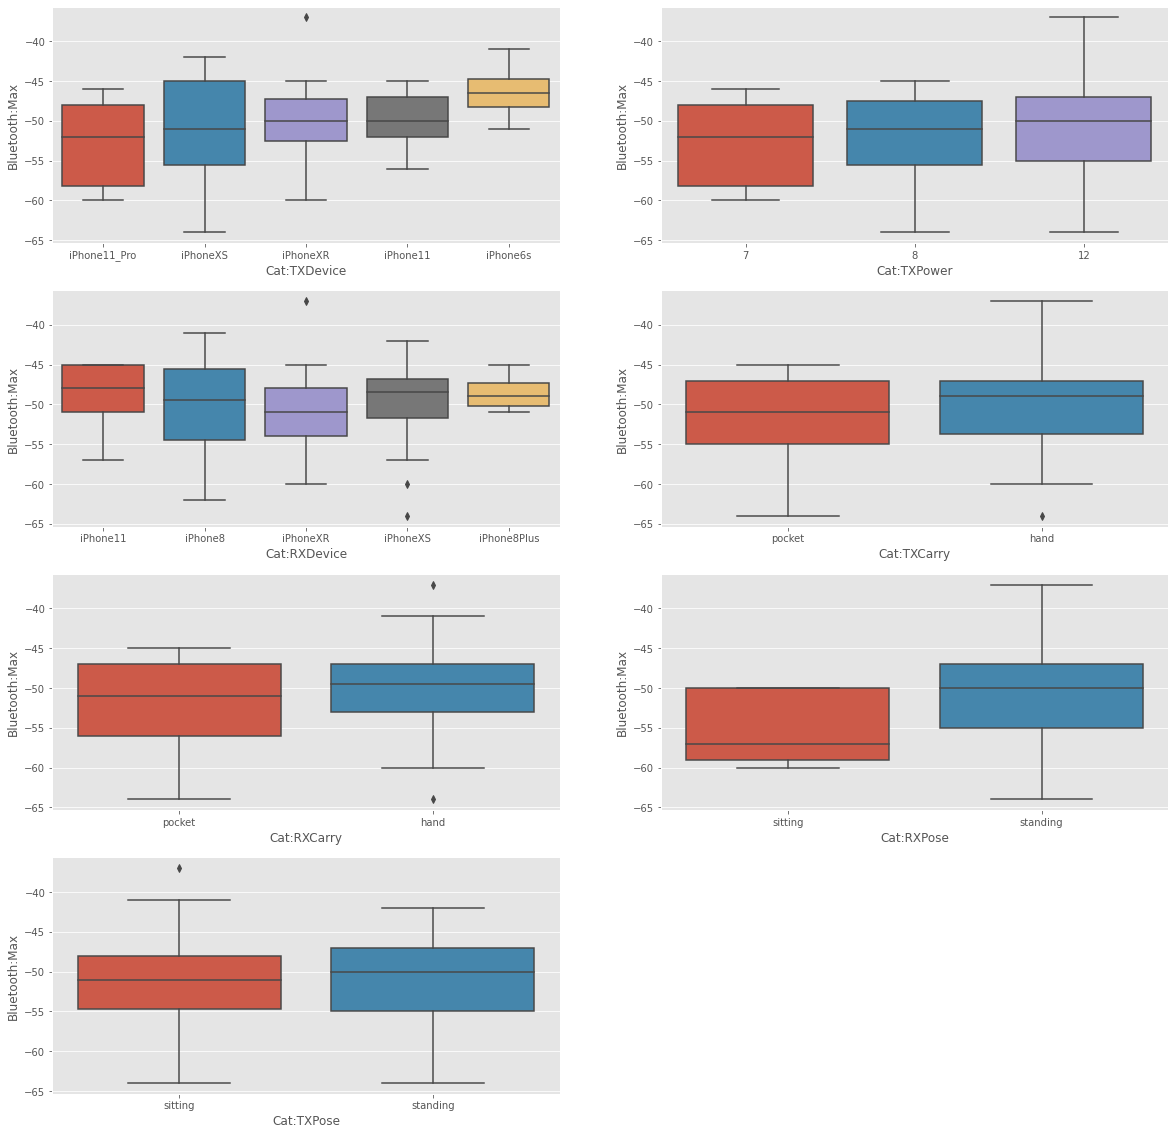

In [115]:
order = {
    "Cat:TXDevice" : ["iPhone11_Pro", "iPhoneXS", "iPhoneXR", "iPhone11",   "iPhone6s"],
    "Cat:RXDevice" : ["iPhone11", "iPhone8", "iPhoneXR", "iPhoneXS", "iPhone8Plus", ],
    "Cat:TXPower" : ["7", "8", "12"],
    "Cat:RXPose" : ["sitting", "standing", ],
    "Cat:TXPose" : ["sitting", "standing", ]
}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()
fig.delaxes(axes[-1])
subset = trainset[trainset["Bluetooth:Max"] < 50.]
for ax, col in zip(axes, cat_cols):
    sns.boxplot(x=col, y="Bluetooth:Max", data=subset,
                order=order.get(col),
                ax=ax);

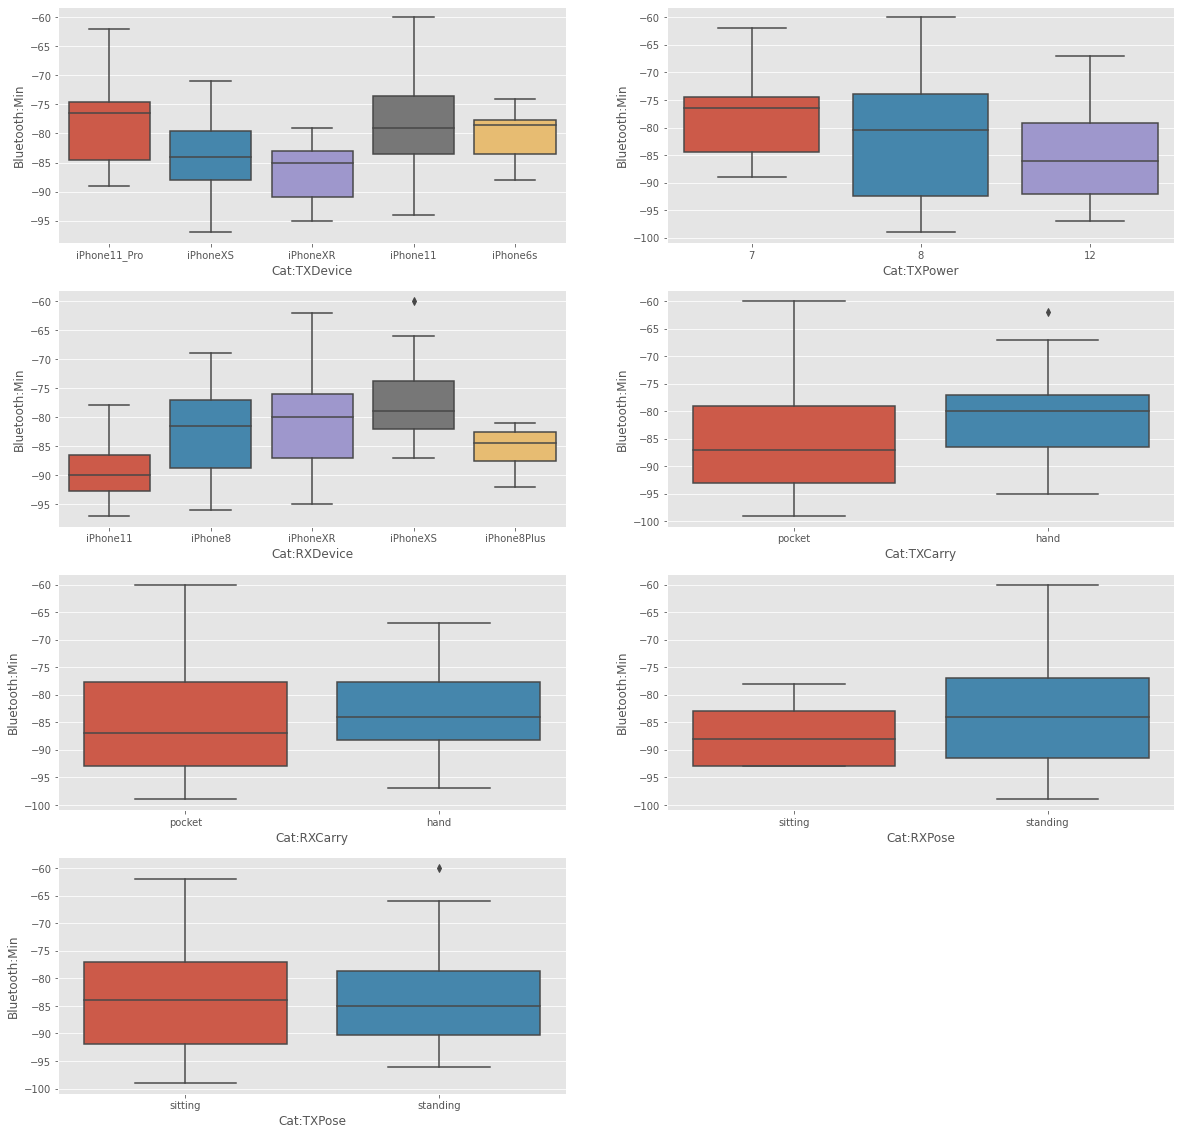

In [116]:
order = {
    "Cat:TXDevice" : ["iPhone11_Pro", "iPhoneXS", "iPhoneXR", "iPhone11",   "iPhone6s"],
    "Cat:RXDevice" : ["iPhone11", "iPhone8", "iPhoneXR", "iPhoneXS", "iPhone8Plus", ],
    "Cat:TXPower" : ["7", "8", "12"],
    "Cat:RXPose" : ["sitting", "standing", ],
    "Cat:TXPose" : ["sitting", "standing", ]
}

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()
fig.delaxes(axes[-1])
#subset = trainset[trainset["Bluetooth:Max"] < 50.]
for ax, col in zip(axes, cat_cols):
    sns.boxplot(x=col, y="Bluetooth:Min", data=trainset,
                order=order.get(col),
                ax=ax);

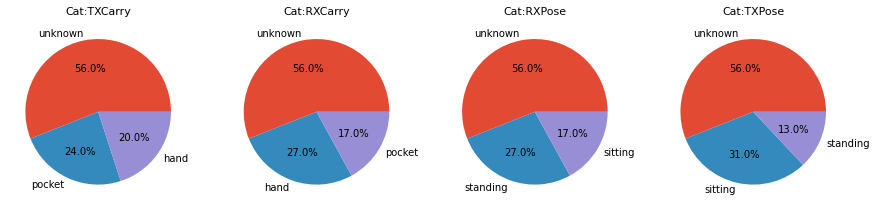

In [140]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 10))
axes = axes.flatten()
cols = [ col for col in cat_cols if "Carry" in col or "Pose" in col]
for ax, col in zip(axes, cols):
        counts = devset[col].value_counts()
        indices = counts.index
        values = counts.values
        ax.pie(values, labels=indices,  autopct='%1.1f%%',)
        ax.set_title(col, fontsize=11)